# 31 Bus Ridership
### Examining ridership over time since 2015 when the 31 bus began operating

In [30]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
data = pd.read_csv('CTA_-_Ridership_-_Bus_Routes_-_Daily_Totals_by_Route.csv')
data['date'] = pd.to_datetime(data['date'])
data.columns

Index(['route', 'date', 'daytype', 'rides'], dtype='object')

In [3]:
data.daytype.unique()
data.head()

,route,date,daytype,rides
0,3,2001-01-01,U,7354
1,4,2001-01-01,U,9288
2,6,2001-01-01,U,6048
3,8,2001-01-01,U,6309
4,9,2001-01-01,U,11207


In [4]:
data[:5]

,route,date,daytype,rides
0,3,2001-01-01,U,7354
1,4,2001-01-01,U,9288
2,6,2001-01-01,U,6048
3,8,2001-01-01,U,6309
4,9,2001-01-01,U,11207


In [5]:
#Filter by bus route and weekdays
bus_data = data.loc[(data['route'] == '31') & (data['daytype'] == 'W')]
bus_data.head()

,route,date,daytype,rides
706333,31,2016-09-06,W,369
706334,31,2016-09-07,W,293
706335,31,2016-09-08,W,407
706336,31,2016-09-09,W,301
706337,31,2016-09-12,W,446


In [29]:
#c = data.resample('').count()
#plt.figure(figsize=(15,6))
#plt.plot(data["date"], data["rides"], label = "ridership")
#plt.style.use('seaborn-darkgrid')

In [86]:
plt.figure(figsize=(15,6))
plot_data = bus_data[["date", "rides"]].copy()
plot_data.head()
#plot_data.plot.line()

,date,rides
706333,2016-09-06,369
706334,2016-09-07,293
706335,2016-09-08,407
706336,2016-09-09,301
706337,2016-09-12,446


<Figure size 1080x432 with 0 Axes>

In [91]:
#plot_data.set_index('date', inplace=True)
#plot_data.plot.line(x=plot_data['date'], y=plot_data['rides'])

Text(0.5,1,'31 Bus Ridership')

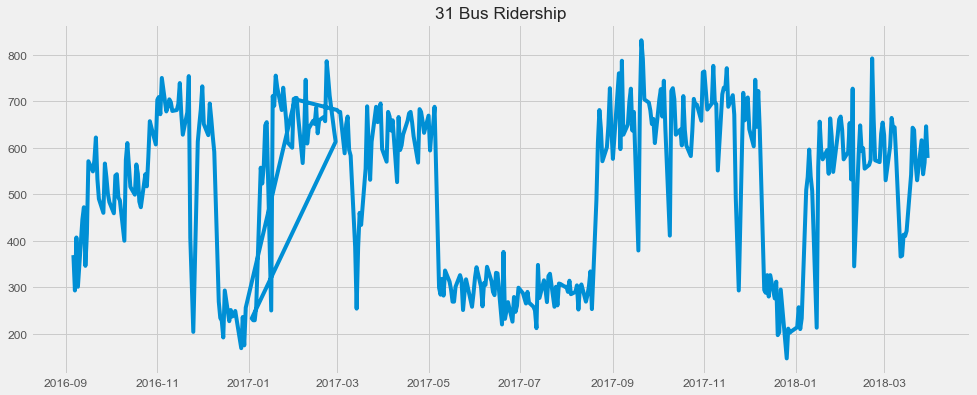

In [89]:
plt.figure(figsize=(15,6))
plt.plot(plot_data)
plt.title("31 Bus Ridership")

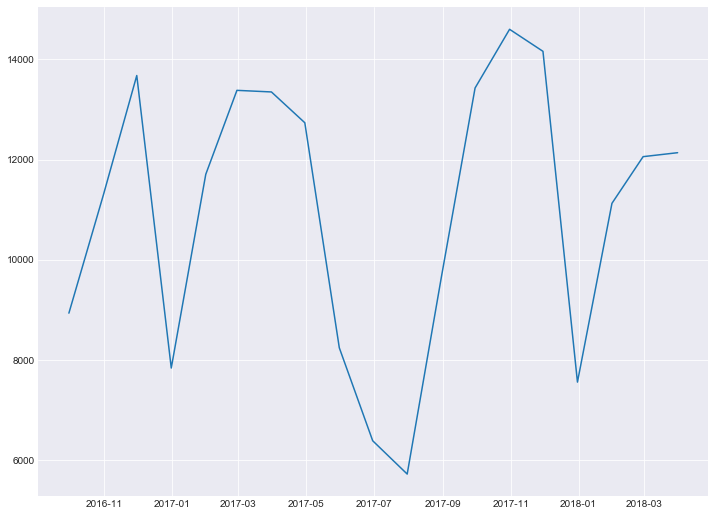

In [26]:
plt.figure(figsize=(12,9))
m = plot_data.resample('M').sum()
fig = plt.plot(m)
#fig, ax = plt.subplot(1,1, figsize = (12,9))

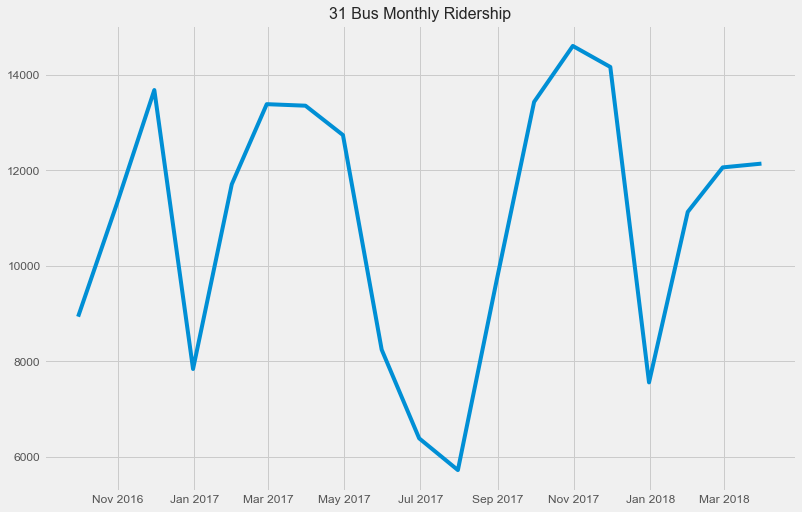

In [94]:
##This is the photo that I sent sam as a PNG!
m = plot_data.resample('M').sum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,8))
fig = plt.plot(m)
fig = plt.title("31 Bus Monthly Ridership", fontname='arial', fontsize=16)
style.use('fivethirtyeight')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.rc('font', size=12)
plt.savefig('monthly_ridership.png')
#_ = plt.xticks(rotation=90)

In [93]:
plt.savefig('monthly_ridership.png')

<Figure size 432x288 with 0 Axes>

In [95]:
#Averages each year
plot_data.head()

,rides
date,
2016-09-06,369
2016-09-07,293
2016-09-08,407
2016-09-09,301
2016-09-12,446


In [101]:
#Average daily rides for 2016
plot_data['2016-09-06':'2016-12-30'].mean()

rides    509.097561
dtype: float64

In [100]:
#Average daily ride for 2017
plot_data['2017-01-01':'2017-12-31'].mean()

rides    515.614173
dtype: float64

In [103]:
#Average daily ride for 2017
plot_data['2018-01-01':].mean()

rides    551.9375
dtype: float64